In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  RandomForestClassifier
from sklearn import metrics

In [4]:
import numpy as np

In [5]:
import pandas as pd
import os
import glob

In [6]:
dir_list = ["1_1","1_2","2_1","2_2","3_1","3_2"]

In [7]:
test_dir_list = ["1_3","1_4","1_5","1_6","1_7","2_3","2_4","2_5","2_6","2_7","3_3"]

### setting 2

In [6]:
one_train = pd.read_csv("one_train_combine.csv")

In [7]:
one_test = pd.read_csv("one_test_combine.csv")

In [8]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [9]:
one_train = clean_dataset(one_train)
one_test = clean_dataset(one_test)

In [16]:
one_train["RUL_x"]

0          14160.099610
1          14160.099220
2          14160.098830
3          14160.098440
4          14160.098050
               ...     
2194170        0.001562
2194171        0.001171
2194172        0.000781
2194173        0.000390
2194174        0.000000
Name: RUL_x, Length: 2194175, dtype: float64

In [33]:
one_train["id"].max()

4.0

In [36]:
one_train

,Unnamed: 0_x,Horiz_acc,id_x,av_horiz,sd_horiz,peak_horiz,rms_horiz,skew_horiz,kurt_horiz,crest_horiz,...,peak_temp,rms_temp,skew_temp,kurt_temp,crest_temp,clear_temp,shape_temp,imp_temp,RUL_y,id
0,28169.0,-0.687,1.0,0.199769,0.378617,0.917,0.421599,-0.509550,-0.252213,2.175055,...,70.303,70.168972,0.009265,-1.213437,1.00191,1.001911,1.000001,1.001911,14160.1,1.0
1,28179.0,0.617,1.0,0.209808,0.386307,0.917,0.433027,-0.512467,-0.362140,2.117648,...,70.303,70.168972,0.009265,-1.213437,1.00191,1.001911,1.000001,1.001911,14160.1,1.0
2,28189.0,0.103,1.0,0.178500,0.358700,0.727,0.394435,-0.688946,-0.358079,1.843143,...,70.303,70.168972,0.009265,-1.213437,1.00191,1.001911,1.000001,1.001911,14160.1,1.0
3,28199.0,0.036,1.0,0.189885,0.348786,0.727,0.391189,-0.772345,-0.057269,1.858437,...,70.303,70.168972,0.009265,-1.213437,1.00191,1.001911,1.000001,1.001911,14160.1,1.0
4,28209.0,-0.577,1.0,0.152615,0.376958,0.727,0.399905,-0.660933,-0.446055,1.817934,...,70.303,70.168972,0.009265,-1.213437,1.00191,1.001911,1.000001,1.001911,14160.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194170,5782999.0,1.251,1.0,0.438269,2.219883,8.607,2.220456,2.063591,5.276878,3.876231,...,100.253,100.232917,0.337115,-1.146364,1.00020,1.000200,1.000000,1.000200,0.0,4.0
2194171,5783009.0,-0.978,1.0,0.265846,2.144994,8.607,2.120073,2.410084,7.032378,4.059765,...,100.253,100.232917,0.337115,-1.146364,1.00020,1.000200,1.000000,1.000200,0.0,4.0
2194172,5783019.0,0.448,1.0,-0.047962,1.310312,3.293,1.285762,0.188332,0.545341,2.561128,...,100.253,100.232917,0.337115,-1.146364,1.00020,1.000200,1.000000,1.000200,0.0,4.0
2194173,5783029.0,0.285,1.0,-0.048385,1.310198,3.293,1.285666,0.189358,0.546782,2.561318,...,100.253,100.232917,0.337115,-1.146364,1.00020,1.000200,1.000000,1.000200,0.0,4.0


In [13]:
def two_time_group(one_train):
    time_group_list = []
    for i in range(1,int(one_train["id"].max())+1,1):
        one_id = one_train[one_train["id"]==i][["id","RUL_x"]]
        one_id = one_id.reset_index()
        one_id.loc[one_id["RUL_x"]>one_id.loc[0,"RUL_x"]/2,"time_group"] = 0
        one_id.loc[one_id["RUL_x"]<one_id.loc[0,"RUL_x"]/2,"time_group"] = 1
        time_group_list = time_group_list + list(one_id["time_group"].values)
    one_train["time_group"] = time_group_list
    return one_train

In [135]:
one_id.loc[one_id["RUL_x"]>one_id.loc[0,"RUL_x"]/2,"time_group"] = 0
one_id.loc[(one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.5) & (one_id["RUL_x"]>one_id.loc[0,"RUL_x"]*0.25),"time_group"] = 1
one_id.loc[(one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.25) & (one_id["RUL_x"]>one_id.loc[0,"RUL_x"]*0.125),"time_group"] = 2 
one_id.loc[one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.125,"time_group"] = 3

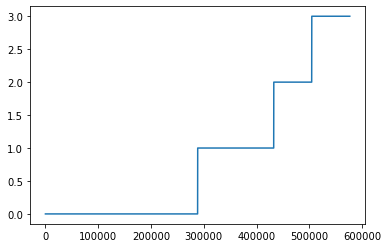

In [136]:
plt.plot(one_id["time_group"])

In [104]:
one_id.loc[0,"RUL_x"]*0.75

16890.07470675

In [11]:
def three_time_group(one_train):
    time_group_list = []
    for i in range(1,int(one_train["id"].max())+1,1):
        one_id = one_train[one_train["id"]==i][["id","RUL_x"]]
        one_id = one_id.reset_index()
        one_id.loc[one_id["RUL_x"]>one_id.loc[0,"RUL_x"]/2,"time_group"] = 0
        one_id.loc[(one_id["RUL_x"]<one_id.loc[0,"RUL_x"]/2) & (one_id["RUL_x"]>one_id.loc[0,"RUL_x"]*0.25),"time_group"] = 1
        one_id.loc[one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.25,"time_group"] = 2
        time_group_list = time_group_list + list(one_id["time_group"].values)
    one_train["time_group"] = time_group_list
    return one_train

In [12]:
def four_time_group(one_train):
    time_group_list = []
    for i in range(1,int(one_train["id"].max())+1,1):
        one_id = one_train[one_train["id"]==i][["id","RUL_x"]]
        one_id = one_id.reset_index()
        one_id.loc[one_id["RUL_x"]>one_id.loc[0,"RUL_x"]/2,"time_group"] = 0
        one_id.loc[(one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.5) & (one_id["RUL_x"]>one_id.loc[0,"RUL_x"]*0.25),"time_group"] = 1
        one_id.loc[(one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.25) & (one_id["RUL_x"]>one_id.loc[0,"RUL_x"]*0.125),"time_group"] = 2 
        one_id.loc[one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.125,"time_group"] = 3
        time_group_list = time_group_list + list(one_id["time_group"].values)
    one_train["time_group"] = time_group_list
    return one_train

In [65]:
one_train = time_group(one_train)

In [67]:
one_test = time_group(one_test)

In [70]:
one_train = one_train.reset_index()
one_test = one_test.reset_index()

In [113]:
X_train = one_train.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
X_test = one_test.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
y_train = one_train["time_group"]
y_test = one_test["time_group"]

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [79]:
y_test_predict = lr.predict(X_test)
y_train_predict = lr.predict(X_train)

train_score = accuracy_score(y_train, y_train_predict)
test_score = accuracy_score(y_test, y_test_predict)
train_f1 = f1_score(y_train, y_train_predict)
test_f1 = f1_score(y_test, y_test_predict)
print('accuracy training: %.3f, accuracy testing: %.3f' % (
      (train_score), (test_score)))
print('F1 training: %.3f, F1 testing: %.3f' % (
      (train_f1), (test_f1)))

accuracy training: 0.507, accuracy testing: 0.503
F1 training: 0.520, F1 testing: 0.520


In [15]:
def plot_features_weights(model, weights, feature_names):
    

    (px, py) = (8, 10) if len(weights) > 30 else (8, 5)
    W = pd.DataFrame({'Weights':weights}, feature_names)
    W_df = W.sort_values(by='Weights', ascending=True)
    W_df.tail(10).plot(kind='barh', color='r', figsize=(px,py))
    plt.xlabel(model)
    plt.gca().legend_ = None

In [16]:
def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):
    plt.figure(figsize=(20,10))
    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-50, xmax=y_train.max()+50, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()

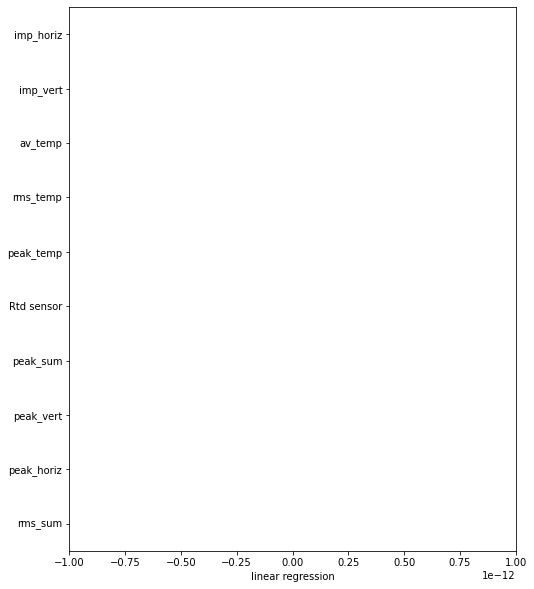

In [86]:
plot_features_weights('linear regression',lr.coef_[0], X_train.columns)

In [88]:
y_train_predict

array([0., 0., 0., ..., 0., 1., 1.])

In [93]:
rf = RandomForestClassifier(random_state=0,max_depth=6,n_estimators=50,min_samples_split=100,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [94]:
y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

train_score = accuracy_score(y_train, y_train_predict)
test_score = accuracy_score(y_test, y_test_predict)
train_f1 = f1_score(y_train, y_train_predict)
test_f1 = f1_score(y_test, y_test_predict)
print('accuracy training: %.3f, accuracy testing: %.3f' % (
      (train_score), (test_score)))
print('F1 training: %.3f, F1 testing: %.3f' % (
      (train_f1), (test_f1)))

accuracy training: 0.761, accuracy testing: 0.722
F1 training: 0.801, F1 testing: 0.760


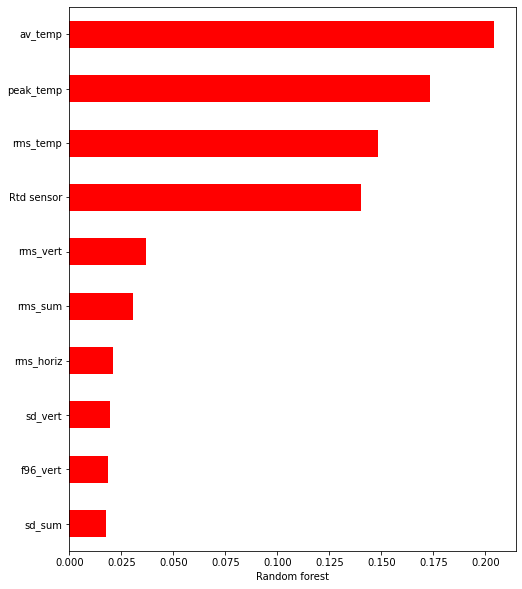

In [95]:
plot_features_weights('Random forest',rf.feature_importances_, X_train.columns)

In [129]:
one_train = three_time_group(one_train)
one_test = three_time_group(one_test)
# one_train = one_train.reset_index()
# one_test = one_test.reset_index()
X_train = one_train.drop(["level_0","index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
X_test = one_test.drop(["level_0","index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
y_train = one_train["time_group"]
y_test = one_test["time_group"]

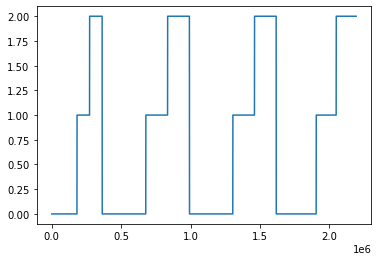

In [130]:
plt.plot(y_train)

In [132]:
rf = RandomForestClassifier(random_state=0,max_depth=6,n_estimators=50,min_samples_split=100,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [133]:
y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

train_score = accuracy_score(y_train, y_train_predict)
test_score = accuracy_score(y_test, y_test_predict)
train_f1 = f1_score(y_train, y_train_predict,average="weighted")
test_f1 = f1_score(y_test, y_test_predict,average="weighted")
print('accuracy training: %.3f, accuracy testing: %.3f' % (
      (train_score), (test_score)))
print('F1 training: %.3f, F1 testing: %.3f' % (
      (train_f1), (test_f1)))

accuracy training: 0.630, accuracy testing: 0.781
F1 training: 0.568, F1 testing: 0.765


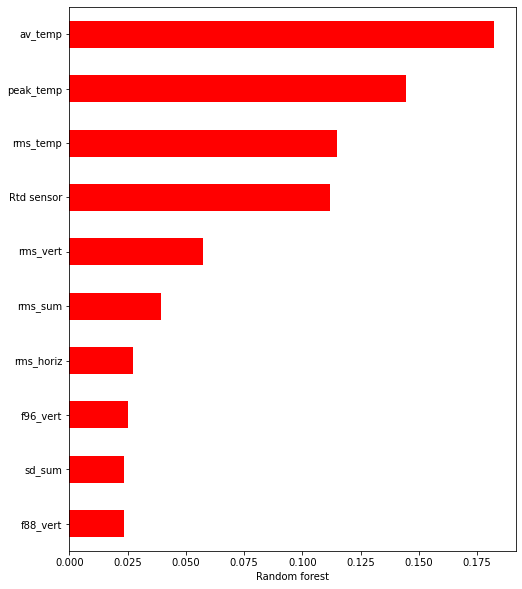

In [134]:
plot_features_weights('Random forest',rf.feature_importances_, X_train.columns)

In [18]:
one_train = four_time_group(one_train)
one_test = four_time_group(one_test)
#one_train = one_train.reset_index()
#one_test = one_test.reset_index()
X_train = one_train.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
X_test = one_test.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
y_train = one_train["time_group"]
y_test = one_test["time_group"]

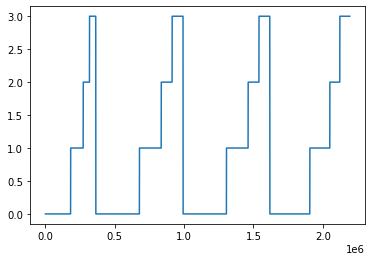

In [20]:
plt.plot(y_train)

In [22]:
rf = RandomForestClassifier(random_state=0,max_depth=6,n_estimators=50,min_samples_split=100,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [24]:
y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

train_score = accuracy_score(y_train, y_train_predict)
test_score = accuracy_score(y_test, y_test_predict)
train_f1 = f1_score(y_train, y_train_predict,average="weighted")
test_f1 = f1_score(y_test, y_test_predict,average="weighted")
print('accuracy training: %.3f, accuracy testing: %.3f' % (
      (train_score), (test_score)))
print('F1 training: %.3f, F1 testing: %.3f' % (
      (train_f1), (test_f1)))

accuracy training: 0.613, accuracy testing: 0.718
F1 training: 0.544, F1 testing: 0.694


In [ ]:
ans_df = pd.DataFrame(y_train)

In [ ]:
ans_df["rf_predict"] = y_train_predict

In [ ]:

train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

In [ ]:
y_train = ans_df[ans_df["RUL"]<500]["RUL"]
y_train_predict = ans_df[ans_df["RUL"]<500]["rf_predict"]
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

In [ ]:
y_train = ans_df[ans_df["RUL"]<10000]["RUL"]
y_train_predict = ans_df[ans_df["RUL"]<10000]["rf_predict"]
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

In [ ]:
y_train = ans_df[ans_df["RUL"]>10000]["RUL"]
y_train_predict = ans_df[ans_df["RUL"]>10000]["rf_predict"]
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

In [ ]:
ans_df[ans_df["RUL"]>10000]

In [ ]:
plt.scatter(ans_df.index,ans_df["RUL"])

In [ ]:
plot_features_weights('Random Forest Regressor', rf.feature_importances_, X_train.columns)

In [ ]:
plot_residual('Random Forest Regressor',y_train, y_train_predict, y_test, y_test_predict)

In [ ]:
y_train

In [ ]:
y_train_predict 

In [ ]:
mean_absolute_percentage_error

In [ ]:
X_train.isnull().values.any()

In [ ]:
# 計算相關係數
corr = one_train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
plt.figure(figsize=(10,40))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(pd.DataFrame(corr["RUL"].sort_values(ascending=False)), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
plt.scatter(one_train["RUL"],one_train["p2ph_vert"])

In [ ]:
plt.scatter(one_train["RUL"],one_train["av_sum"])